In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
import SHFunctions as shf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import os

from jupyterthemes import jtplot
jtplot.style(theme='solarizedl')

from IPython.core.display import display, HTML
np.set_printoptions(linewidth = 270)

In [2]:
# A, S = shf.MakeOneSingA(5, 8, delta = .00000)
# S = np.real(S)
delt = .00000
m = 10
A = shf.MakeSingularA(m, 2, delta = delt)

# A = np.load('200121_Coefficients.npy')

# $S$의 spectral radius 확인
- 목적 : cyclic reduction 적용 가능 여부 확인
- 웬만하면 안 되는 방향으로 ㅋㅋㅋㅋㅋㅋ

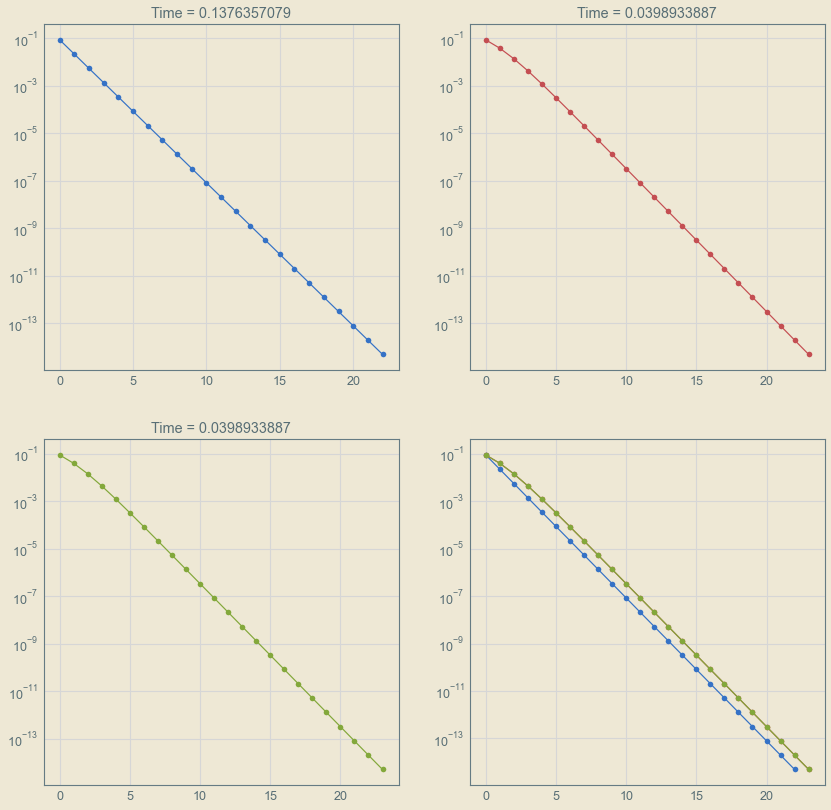

In [3]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
S3 = shf.BrunoCRPoly(A)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

# 어? 생각보다 잘 되네;;;;
## 망함 ㅋㅋㅋㅋㅋㅋㅋㅋ

In [4]:
np.max(np.abs(nla.eig(Ss['sol'])[0]))

0.9999998806013206

In [5]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[0.07572459 0.16621709 0.08381329 0.05357489 0.08659767 0.06157143 0.08353626 0.09593476 0.14290861 0.15012128]
 [0.11997115 0.09736666 0.0616401  0.05786896 0.14991961 0.05092714 0.1375407  0.06777112 0.09557514 0.16141931]
 [0.12322182 0.14000805 0.04910513 0.06312517 0.1021215  0.06828392 0.14226964 0.05613811 0.14602233 0.1097042 ]
 [0.15143989 0.17091221 0.0929453  0.04482724 0.07910064 0.05559747 0.09611578 0.06002476 0.10572972 0.14330686]
 [0.07802574 0.13588376 0.0779401  0.06897922 0.0775878  0.05356077 0.09426869 0.07959563 0.14609725 0.18806091]
 [0.0813628  0.13799297 0.09463372 0.09203872 0.11330965 0.03355457 0.11375814 0.09209161 0.10388775 0.13736995]
 [0.13767704 0.14125045 0.06433864 0.08142272 0.12820104 0.03751364 0.0761594  0.06865728 0.10850874 0.15627093]
 [0.11885112 0.1442408  0.07125868 0.08828568 0.11884463 0.05534075 0.1001039  0.0497062  0.11627126 0.13709685]
 [0.15146402 0.15670528 0.08351798 0.05626686 0.11579313 0.05129997 0.10971105 0.08735

In [6]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : 1.9357249593099365e-10
Newton - Bruno : 1.9357249593099365e-10


In [7]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 4.955093670723148e-15
CR : 4.991089007039109e-15
Bruno : 4.991089007039109e-15


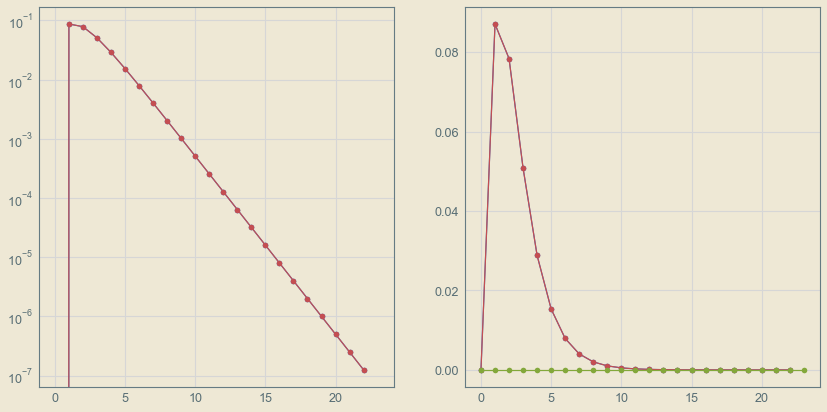

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

# $S$의 spectral radius를 키워보자

In [9]:
delt = .00000
m = 10
A = shf.MakeSingularA(m, 2, delta = delt)

alph = .1
B = A.copy()
A[1] = B[1] - 2*alph*B[2]
A[0] = alph**2 *B[2] - alph*B[1] + B[0]

C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:291: RuntimeWarning: overflow encountered in matmul
  C1 = C0 @ nla.inv(B0) @ C0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:288: RuntimeWarning: invalid value encountered in matmul
  T0 = T0 - A0 @ nla.inv(B0) @ C0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:290: RuntimeWarning: invalid value encountered in matmul
  B1 = B0 - A0 @ nla.inv(B0) @ C0 - C0 @ nla.inv(B0) @ A0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:353: RuntimeWarning: overflow encountered in matmul
  C0 = F0 @ C0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:352: RuntimeWarning: invalid value encountered in matmul
  W = F2 @ C0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:356: RuntimeWarning: invalid value encountered in matmul
  W = F0 @ A0


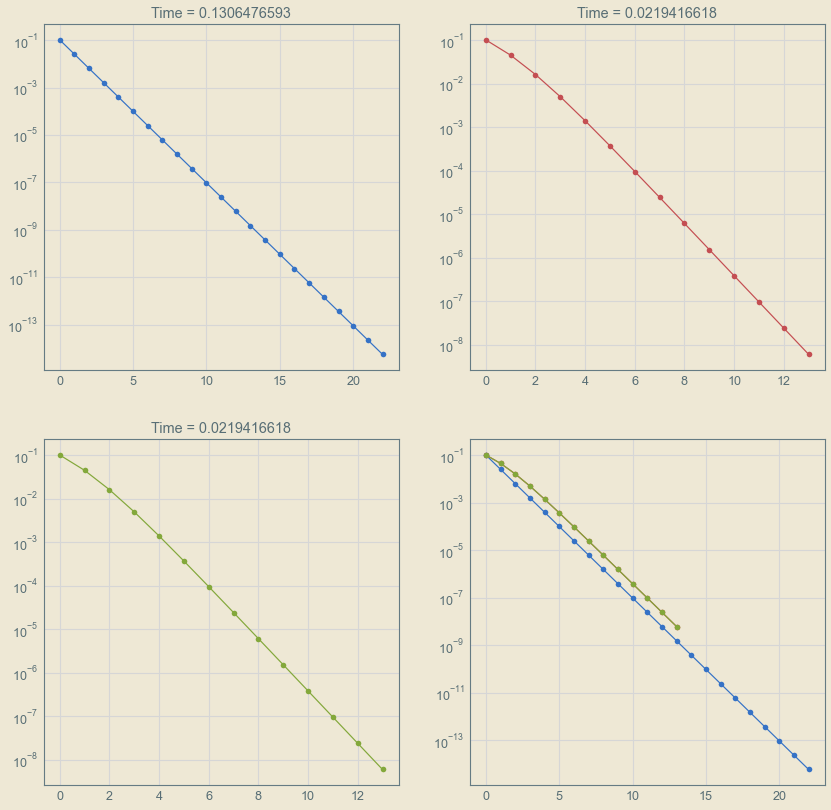

In [10]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
S3 = shf.BrunoCRPoly(A)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

In [11]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[0.17792145 0.12386212 0.0911192  0.08365226 0.11323653 0.10347079 0.07857847 0.11403177 0.11416627 0.09996101]
 [0.13052334 0.17342298 0.08961533 0.11785256 0.1052858  0.10948693 0.09445236 0.09867198 0.0780188  0.10266979]
 [0.12528406 0.11565824 0.15565312 0.10799617 0.11118395 0.11393002 0.09290164 0.06543101 0.08061454 0.13134711]
 [0.12510407 0.11845833 0.10895441 0.17261168 0.08739082 0.11648351 0.08342174 0.10821723 0.10057787 0.0787802 ]
 [0.12823877 0.09232998 0.07724836 0.12591534 0.16141731 0.11524082 0.07229038 0.07518108 0.11396961 0.13816821]
 [0.09331415 0.10411741 0.07282424 0.12126284 0.08724307 0.17078751 0.09561948 0.11710964 0.11409968 0.12362185]
 [0.08739134 0.12297141 0.08625954 0.13396544 0.07609151 0.11325668 0.15440892 0.08042633 0.13134774 0.11388096]
 [0.13820792 0.11946597 0.06355797 0.09141788 0.0651644  0.1021518  0.0801123  0.16816518 0.14475791 0.12699853]
 [0.09132925 0.09289621 0.10184764 0.10357723 0.11055298 0.0991702  0.07227796 0.13385

In [12]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : nan
Newton - Bruno : nan


In [13]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 5.767318725135187e-15
CR : nan
Bruno : nan


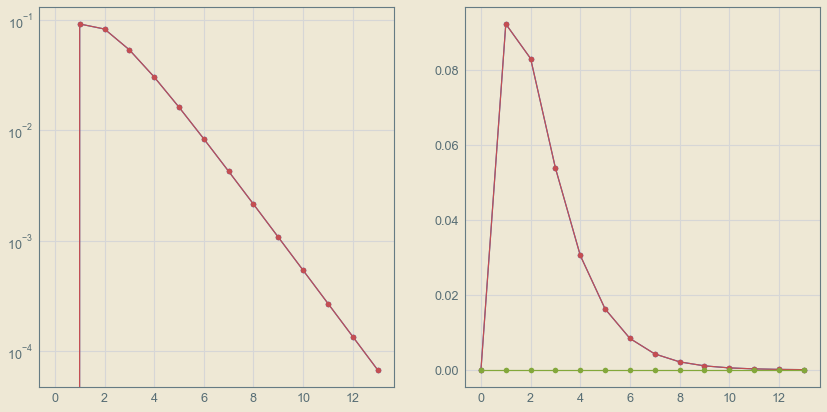

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

In [15]:
np.max(np.abs(nla.eig(np.eye(10) + A[1])[0]))

0.2666666666666669

# Cyclic Reduction이 잘 작동하지 않는 예를 찾은 것 같은데??
## 아래의 $A$'s가 예시일 듯

In [16]:
np.set_printoptions(suppress=True)
A

array([[[ 0.1       ,  0.0492028 ,  0.03392643,  0.00878378,  0.04928971,  0.03076748,  0.02281034,  0.04650776,  0.03981938,  0.02222566],
        [ 0.05014432,  0.1       ,  0.03196616,  0.04186614,  0.04210503,  0.03609124,  0.03788843,  0.03217941,  0.00448595,  0.02660664],
        [ 0.04491123,  0.04055507,  0.1       ,  0.0307794 ,  0.04727749,  0.04036273,  0.03652268,  0.00027754,  0.00806719,  0.05458002],
        [ 0.04566468,  0.04298914,  0.05041528,  0.1       ,  0.02380855,  0.04318014,  0.02666753,  0.04065019,  0.02729515,  0.00266266],
        [ 0.0480771 ,  0.01813702,  0.01938477,  0.04933304,  0.1       ,  0.04215356,  0.0172011 ,  0.00744429,  0.03980484,  0.06179762],
        [ 0.01398805,  0.02932575,  0.01576371,  0.04462759,  0.02578334,  0.1       ,  0.03954197,  0.04871558,  0.03863042,  0.04695694],
        [ 0.00923296,  0.04814702,  0.0273785 ,  0.05669446,  0.01333846,  0.04003995,  0.1       ,  0.01248529,  0.05781379,  0.03820291],
        [ 0.05856095

# UQME 상대로도 테스트가 필요
## 그래서 아래를 테스트해 봅시다

In [31]:
delt = .00000
m = 10
A = np.zeros((3, m, m))
A[2] = np.eye(m)
A[0][np.diag_indices(m)] = 15*np.ones(m)
A[0][np.arange(0, 9), np.arange(1, 10)] = -5*np.ones(m-1)
A[0][np.arange(1, 10), np.arange(0, 9)] = -5*np.ones(m-1)
A[1][np.diag_indices(m)] = 30*np.ones(m)
A[1][np.arange(0, 9), np.arange(1, 10)] = -10*np.ones(m-1)
A[1][np.arange(1, 10), np.arange(0, 9)] = -10*np.ones(m-1)
A[1, 0, 0], A[1, m-1, m-1] = 20, 20

# alph = .1
# B = A.copy()
# A[1] = B[1] - 2*alph*B[2]
# A[0] = alph**2 *B[2] - alph*B[1] + B[0]

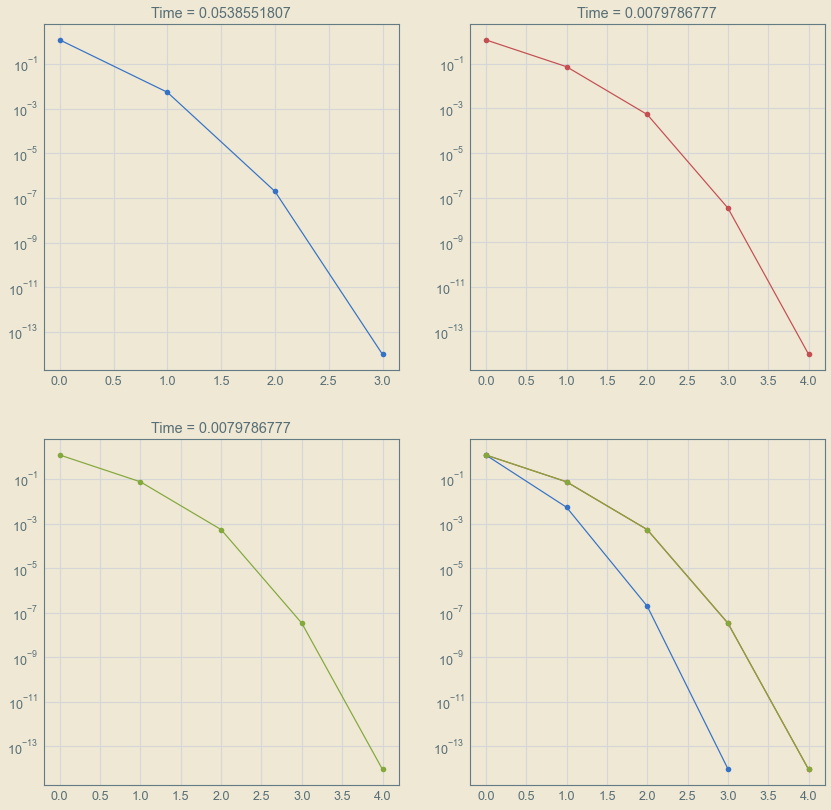

In [32]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
S3 = shf.BrunoCRPoly(A)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

In [33]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[-0.86051451 -0.00687832 -0.00275746 -0.00110608 -0.00044395 -0.00017835 -0.00007184 -0.00002931 -0.00001287 -0.00016479]
 [-0.14685974 -0.51281033 -0.00513226 -0.00205735 -0.00082523 -0.00033131 -0.00013334 -0.00005434 -0.00002374 -0.00029974]
 [-0.05985936 -0.00515106 -0.51207165 -0.00483595 -0.00193849 -0.00077772 -0.00031277 -0.00012729 -0.00005537 -0.00068849]
 [-0.02441236 -0.00207256 -0.00483902 -0.51194648 -0.00478589 -0.00191891 -0.00077118 -0.00031346 -0.0001358  -0.00166538]
 [-0.00996207 -0.00083446 -0.00194097 -0.00478638 -0.51192585 -0.00477887 -0.00191925 -0.00077919 -0.00033627 -0.00406867]
 [-0.00406867 -0.00033627 -0.00077919 -0.00191925 -0.00477887 -0.51192585 -0.00478638 -0.00194097 -0.00083446 -0.00996207]
 [-0.00166538 -0.0001358  -0.00031346 -0.00077118 -0.00191891 -0.00478589 -0.51194648 -0.00483902 -0.00207256 -0.02441236]
 [-0.00068849 -0.00005537 -0.00012729 -0.00031277 -0.00077772 -0.00193849 -0.00483595 -0.51207165 -0.00515106 -0.05985936]
 [-0.0

In [34]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : 6.761457149526e-16
Newton - Bruno : 6.761457149526e-16


In [35]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 9.89513331932303e-15
CR : 9.317270166698952e-15
Bruno : 9.317270166698952e-15


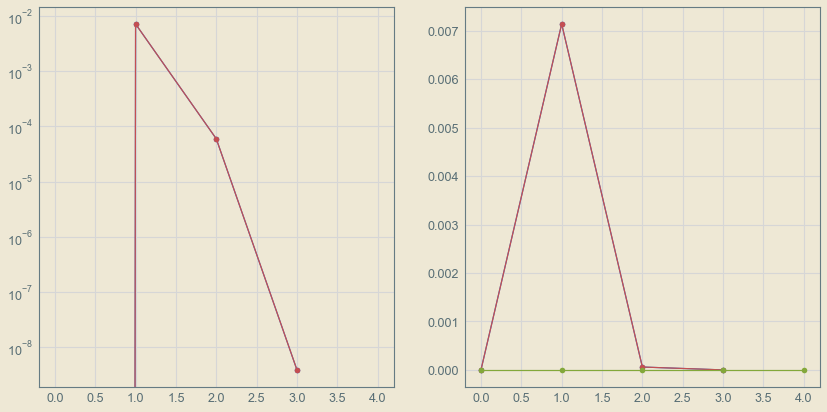

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

In [37]:
np.max(np.abs(nla.eig(Ss['sol'])[0]))

0.8642115765678838

## 추가 solution 평행이동

In [68]:
delt = .00000
m = 10
A = np.zeros((3, m, m))
A[2] = np.eye(m)
A[0][np.diag_indices(m)] = 15*np.ones(m)
A[0][np.arange(0, 9), np.arange(1, 10)] = -5*np.ones(m-1)
A[0][np.arange(1, 10), np.arange(0, 9)] = -5*np.ones(m-1)
A[1][np.diag_indices(m)] = 30*np.ones(m)
A[1][np.arange(0, 9), np.arange(1, 10)] = -10*np.ones(m-1)
A[1][np.arange(1, 10), np.arange(0, 9)] = -10*np.ones(m-1)
A[1, 0, 0], A[1, m-1, m-1] = 20, 20

alph = -.14
B = A.copy()
A[1] = B[1] - 2*alph*B[2]
A[0] = alph**2 *B[2] - alph*B[1] + B[0]

In [76]:
(nla.inv(A[1]) @ A[0])

array([[ 0.93322465, -0.0036474 , -0.00137599, -0.0005191 , -0.00019583, -0.00007389, -0.0000279 , -0.00001059, -0.00000418,  0.0000625 ],
       [ 0.11061959,  0.63260307, -0.00279051, -0.00105273, -0.00039715, -0.00014985, -0.00005658, -0.00002149, -0.00000848,  0.00012676],
       [ 0.04173148, -0.00279051,  0.63292633, -0.00266856, -0.00100674, -0.00037985, -0.00014343, -0.00005446, -0.00002149,  0.00032131],
       [ 0.01574333, -0.00105273, -0.00266856,  0.63297232, -0.00265126, -0.00100032, -0.00037773, -0.00014343, -0.00005658,  0.00084618],
       [ 0.00593931, -0.00039715, -0.00100674, -0.00265126,  0.63297873, -0.00264914, -0.00100032, -0.00037985, -0.00014985,  0.00224092],
       [ 0.00224092, -0.00014985, -0.00037985, -0.00100032, -0.00264914,  0.63297873, -0.00265126, -0.00100674, -0.00039715,  0.00593931],
       [ 0.00084618, -0.00005658, -0.00014343, -0.00037773, -0.00100032, -0.00265126,  0.63297232, -0.00266856, -0.00105273,  0.01574333],
       [ 0.00032131, -0.000

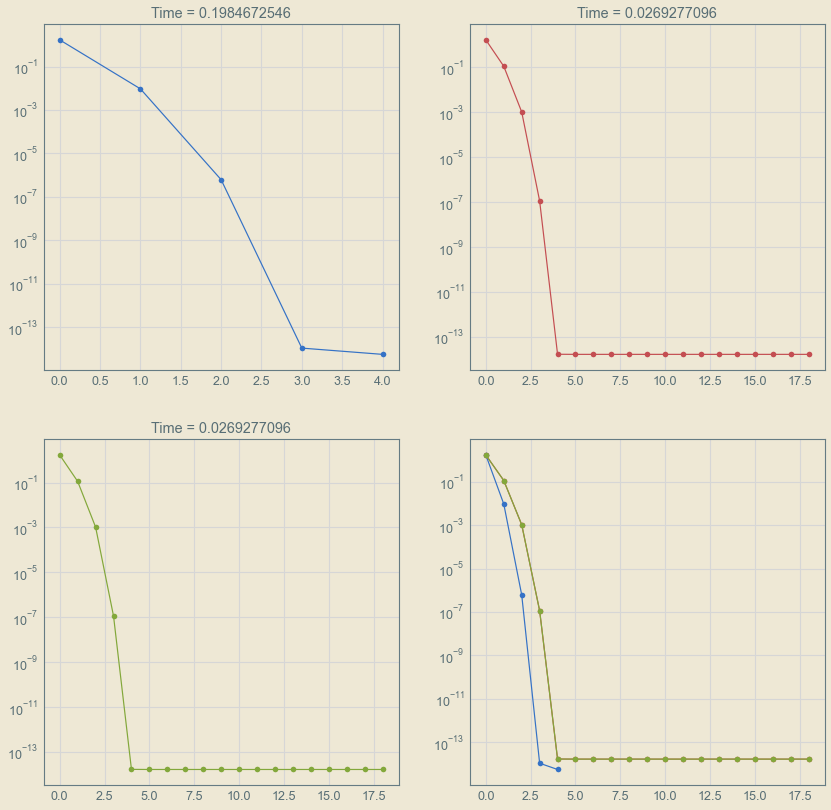

In [70]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
S3 = shf.BrunoCRPoly(A)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

In [71]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[-1.00051451 -0.00687832 -0.00275746 -0.00110608 -0.00044395 -0.00017835 -0.00007184 -0.00002931 -0.00001287 -0.00016479]
 [-0.14685974 -0.65281033 -0.00513226 -0.00205735 -0.00082523 -0.00033131 -0.00013334 -0.00005434 -0.00002374 -0.00029974]
 [-0.05985936 -0.00515106 -0.65207165 -0.00483595 -0.00193849 -0.00077772 -0.00031277 -0.00012729 -0.00005537 -0.00068849]
 [-0.02441236 -0.00207256 -0.00483902 -0.65194648 -0.00478589 -0.00191891 -0.00077118 -0.00031346 -0.0001358  -0.00166538]
 [-0.00996207 -0.00083446 -0.00194097 -0.00478638 -0.65192585 -0.00477887 -0.00191925 -0.00077919 -0.00033627 -0.00406867]
 [-0.00406867 -0.00033627 -0.00077919 -0.00191925 -0.00477887 -0.65192585 -0.00478638 -0.00194097 -0.00083446 -0.00996207]
 [-0.00166538 -0.0001358  -0.00031346 -0.00077118 -0.00191891 -0.00478589 -0.65194648 -0.00483902 -0.00207256 -0.02441236]
 [-0.00068849 -0.00005537 -0.00012729 -0.00031277 -0.00077772 -0.00193849 -0.00483595 -0.65207165 -0.00515106 -0.05985936]
 [-0.0

In [72]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : nan
Newton - Bruno : nan


In [73]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 5.549859194198712e-15
CR : nan
Bruno : nan


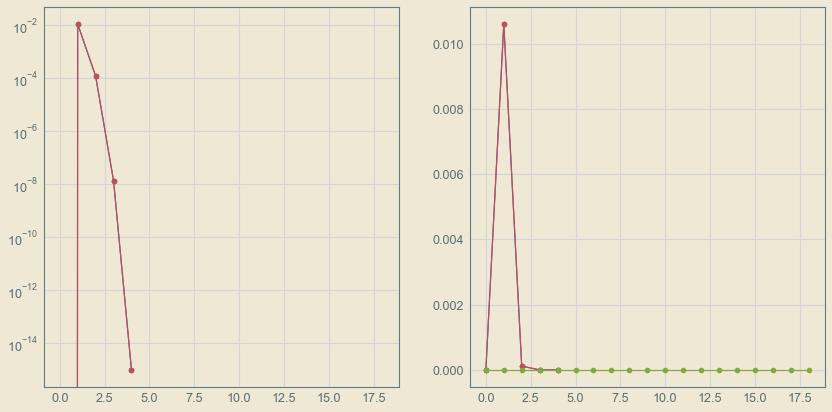

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

In [75]:
np.max(np.abs(nla.eig(Ss['sol'])[0]))

1.0042115765678838